In [1]:
%pylab inline
from __future__ import division
import scipy as sp
from scipy import stats
from scipy.signal import argrelextrema
from scipy.interpolate import interp1d
import operator as op
from decimal import *
import pickle
import mpld3
mpld3.enable_notebook()

Populating the interactive namespace from numpy and matplotlib


In [2]:
%run ../cow.py
%run ../optimize_pkg.py

In [3]:
protocol_target = 10**(-9)
rx_SNR_range = arange(0, 12, 0.01)
tx_SNR_range = arange(5, -10*log10(protocol_target), 0.01)
protocolbit = 4*10**4
user_range = arange(2, 36, 1)

In [4]:
optimize_filepath_down = "../data_tables/optimize_down/n"
optimize_filepath_up = "../data_tables/optimize_up/n"
tx_SNR_range = arange(5, 50, 0.01)

# Slice of Waterfall Optimized Targets

In [5]:
linktargetdct = {
    35 : [-1],
    34 : [-1],
    33 : [-2],
    32 : [-2],
    31 : [-2],
    30 : [-2],
    29 : [-2],
    28 : [-2],
    27 : [-2],
    26 : [-2],
    25 : [-2],
    24 : [-2],
    23 : [-2],
    22 : [-2],
    21 : [-2],
    20 : [-2],
    19 : [-2],
    18 : [-2],
    17 : [-2],
    16 : [-2],
    15 : [-3],
    14 : [-3],
    13 : [-3],
    12 : [-3],
    11 : [-3],
    10 : [-3],
    9 : [-3],
    8 : [-3],
    7 : [-3],
    6 : [-4],
    5 : [-4],
    4 : [-5],
    3 : [-5],
    2 : [-7],
    1 : [-9]
}

In [7]:
print linktargetdct[3]

[-5]


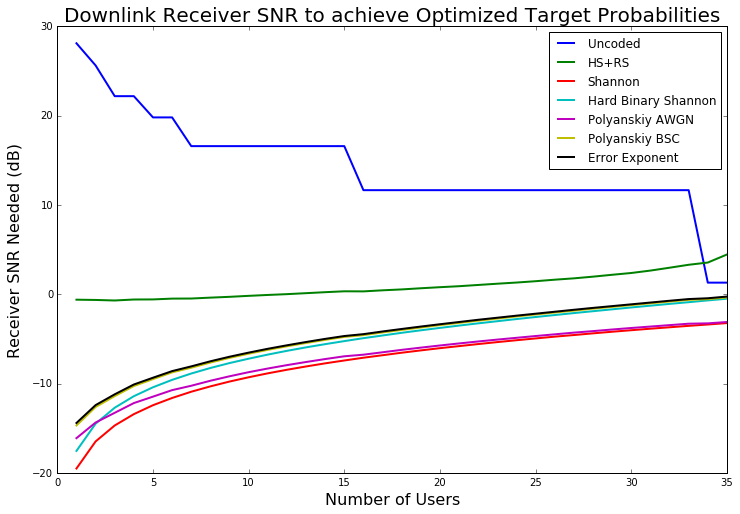

In [26]:
# threshold = 10**(-9)

shannonthresh = zeros(35)
hardshannonthresh = zeros(35)
polythresh = zeros(35)
bscthresh = zeros(35)
expthresh = zeros(35)
hsrsthresh = zeros(35)
uncoded = zeros(35)
# uncoded = 10*log10((Qinv(threshold)**2)/2) * ones(35)

for N in range(1,36):
#     rate = N*160/10000
    threshold = 10**linktargetdct[N][0]

    uncoded[N-1] = 10*log10((Qinv(threshold)**2)/2)
    
    shannonfile = '../data_tables/shannon_tables/n' + str(N) + '.in'
    shannontable = load_table(shannonfile)
    shannonthresh[N-1] = shannontable[0][np.where(np.array(shannontable[1])<=threshold)[0][0]]
    
    hardshannonfile = '../data_tables/hard_shannon_tables/n' + str(N) + '.in'
    hardshannontable = load_table(hardshannonfile)
    hardshannonthresh[N-1] = hardshannontable[0][np.where(np.array(hardshannontable[1])<=threshold)[0][0]]
    
    filename = '../data_tables/hs_rs_downlink/n' + str(N) + '.in'
    hsrstable = load_table(filename)
    hsrsthresh[N-1] = hsrstable[0][np.where(np.array(hsrstable[1])<=threshold)[0][0]]
    
    polyfile = '../data_tables/polyanskiy_down/n' + str(N) + '.in'
    polytable = load_table(polyfile)
    polythresh[N-1] = polytable[0][np.where(np.array(polytable[1])<=threshold)[0][0]]
    
    bscfile = '../data_tables/poly_bsc_converse/down/n' + str(N) + '.in'
    bsctable = load_table(bscfile)
    bscthresh[N-1] = bsctable[0][np.where(np.array(bsctable[1])<=threshold)[0][0]]
    
    expfile = '../data_tables/error_exp/down/n' + str(N) + '.in'
    exptable = load_table(expfile)
    expthresh[N-1] = exptable[0][np.where(np.array(exptable[1])<=threshold)[0][0]]

figure(figsize=(12, 8))
plot(range(1,36), uncoded, lw=2.0, label='Uncoded')
plot(range(1,36), hsrsthresh, lw=2.0, label='HS+RS')
plot(range(1,36), shannonthresh, lw=2.0, label='Shannon')
plot(range(1,36), hardshannonthresh, lw=2.0, label='Hard Binary Shannon')
plot(range(1,36), polythresh, lw=2.0, label='Polyanskiy AWGN')
plot(range(1,36), bscthresh, lw=2.0, label='Polyanskiy BSC')
plot(range(1,36), expthresh, lw=2.0, label='Error Exponent')
xlabel('Number of Users', fontsize=16)
ylabel('Receiver SNR Needed (dB)', fontsize=16, labelpad=10)
title('Downlink Receiver SNR to achieve Optimized Target Probabilities', fontsize=20)
legend(loc=0)
savefig('slice_waterfall_optimize.pdf', bbox='tight')

Populating the interactive namespace from numpy and matplotlib


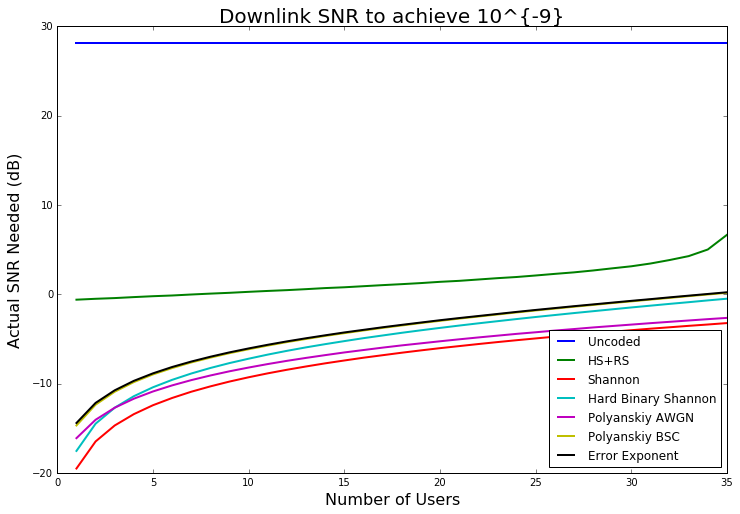

In [8]:
%pylab inline
# %matplotlib inline

threshold = 10**(-9)

shannonthresh_n = zeros(35)
hardshannonthresh_n = zeros(35)
polythresh_n = zeros(35)
bscthresh_n = zeros(35)
expthresh_n = zeros(35)
hsrsthresh_n = zeros(35)
uncoded_n = 10*log10((Qinv(threshold)**2)/2) * ones(35)

for N in range(1,36):
#     rate = N*160/10000

    shannonfile = '../data_tables/shannon_tables/n' + str(N) + '.in'
    shannontable = load_table(shannonfile)
    shannonthresh_n[N-1] = shannontable[0][np.where(np.array(shannontable[1])<=threshold)[0][0]]
    
    hardshannonfile = '../data_tables/hard_shannon_tables/n' + str(N) + '.in'
    hardshannontable = load_table(hardshannonfile)
    hardshannonthresh_n[N-1] = hardshannontable[0][np.where(np.array(hardshannontable[1])<=threshold)[0][0]]
    
    filename = '../data_tables/hs_rs_downlink/n' + str(N) + '.in'
    hsrstable = load_table(filename)
    hsrsthresh_n[N-1] = hsrstable[0][np.where(np.array(hsrstable[1])<=threshold)[0][0]]
    
    polyfile = '../data_tables/polyanskiy_down/n' + str(N) + '.in'
    polytable = load_table(polyfile)
    polythresh_n[N-1] = polytable[0][np.where(np.array(polytable[1])<=threshold)[0][0]]
    
    bscfile = '../data_tables/poly_bsc_converse/down/n' + str(N) + '.in'
    bsctable = load_table(bscfile)
    bscthresh_n[N-1] = bsctable[0][np.where(np.array(bsctable[1])<=threshold)[0][0]]
    
    expfile = '../data_tables/error_exp/down/n' + str(N) + '.in'
    exptable = load_table(expfile)
    expthresh_n[N-1] = exptable[0][np.where(np.array(exptable[1])<=threshold)[0][0]]

figure(figsize=(12, 8))
plot(range(1,36), uncoded_n, lw=2.0, label='Uncoded')
plot(range(1,36), hsrsthresh_n, lw=2.0, label='HS+RS')
plot(range(1,36), shannonthresh_n, lw=2.0, label='Shannon')
plot(range(1,36), hardshannonthresh_n, lw=2.0, label='Hard Binary Shannon')
plot(range(1,36), polythresh_n, lw=2.0, label='Polyanskiy AWGN')
plot(range(1,36), bscthresh_n, lw=2.0, label='Polyanskiy BSC')
plot(range(1,36), expthresh_n, lw=2.0, label='Error Exponent')
xlabel('Number of Users', fontsize=16)
ylabel('Actual SNR Needed (dB)', fontsize=16, labelpad=10)
title('Downlink SNR to achieve 10^{-9}', fontsize=20)
legend(loc=0)
savefig('slice_waterfall_1.pdf', bbox='tight')

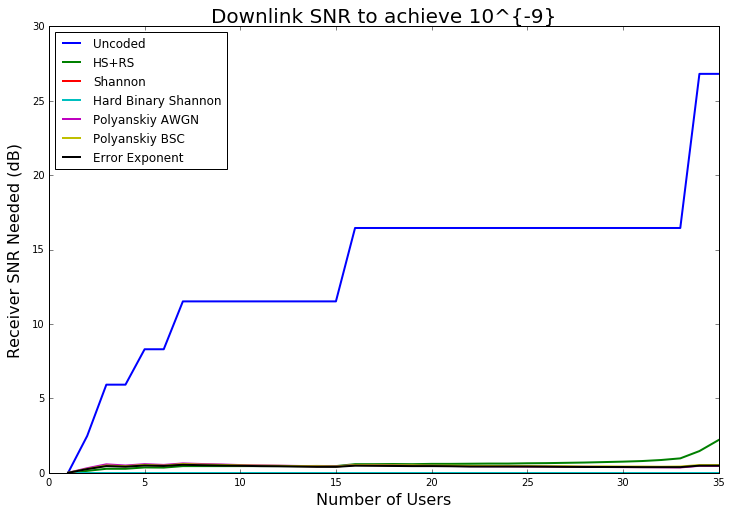

In [33]:
figure(figsize=(12, 8))
plot(range(1,36), uncoded_n-uncoded, lw=2.0, label='Uncoded')
plot(range(1,36), hsrsthresh_n-hsrsthresh, lw=2.0, label='HS+RS')
plot(range(1,36), shannonthresh_n-shannonthresh, lw=2.0, label='Shannon')
plot(range(1,36), hardshannonthresh_n-hardshannonthresh, lw=2.0, label='Hard Binary Shannon')
plot(range(1,36), polythresh_n-polythresh, lw=2.0, label='Polyanskiy AWGN')
plot(range(1,36), bscthresh_n-bscthresh, lw=2.0, label='Polyanskiy BSC')
plot(range(1,36), expthresh_n-expthresh, lw=2.0, label='Error Exponent')
xlabel('Number of Users', fontsize=16)
ylabel('Receiver SNR Needed (dB)', fontsize=16, labelpad=10)
title('Downlink SNR to achieve 10^{-9}', fontsize=20)
legend(loc=0)
savefig('slice_waterfall_down_optimize_penalty.pdf', bbox='tight')

In [11]:
print hsrsthresh_n-hsrsthresh

[ 0.    0.13  0.27  0.27  0.36  0.35  0.45  0.45  0.45  0.45  0.45  0.45
  0.45  0.46  0.45  0.58  0.58  0.59  0.58  0.6   0.6   0.61  0.62  0.62
  0.64  0.65  0.67  0.69  0.72  0.75  0.79  0.86  0.97  1.46  2.2 ]


## Uplink

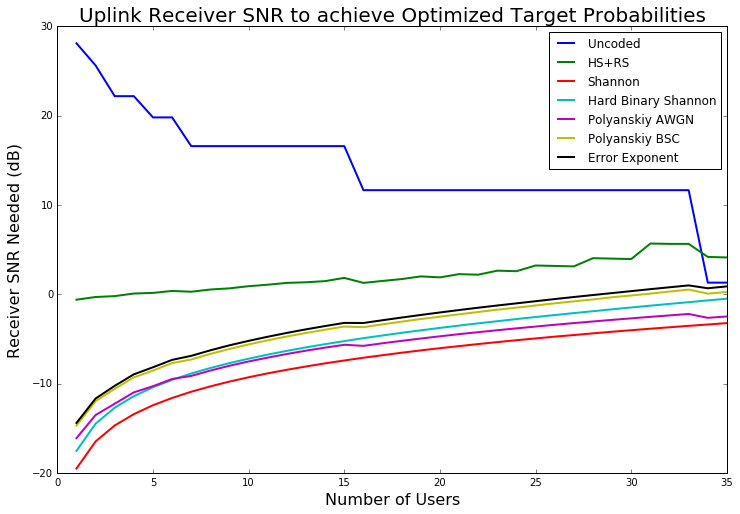

In [28]:
threshold = 10**(-9)

shannonthresh = zeros(35)
hardshannonthresh = zeros(35)
uppolythresh = zeros(35)
uphsrsthresh = zeros(35)
upbscthresh = zeros(35)
upexpthresh = zeros(35)
uncoded = zeros(35)
# uncoded = 10*log10((Qinv(threshold)**2)/2) * ones(35)

for N in range(1,36):
#     rate = N*160/10000
    threshold = 10**linktargetdct[N][0]

    uncoded[N-1] = 10*log10((Qinv(threshold)**2)/2)

    shannonfile = '../data_tables/shannon_tables/n' + str(N) + '.in'
    shannontable = load_table(shannonfile)
    shannonthresh[N-1] = shannontable[0][np.where(np.array(shannontable[1])<=threshold)[0][0]]
    
    hardshannonfile = '../data_tables/hard_shannon_tables/n' + str(N) + '.in'
    hardshannontable = load_table(hardshannonfile)
    hardshannonthresh[N-1] = hardshannontable[0][np.where(np.array(hardshannontable[1])<=threshold)[0][0]]
    
    filename = '../data_tables/hs_rs_uplink/n' + str(N) + '.in'
    hsrstable = load_table(filename)
    uphsrsthresh[N-1] = hsrstable[0][np.where(np.array(hsrstable[1])<=threshold)[0][0]]
    
    polyfile = '../data_tables/polyanskiy_up/n' + str(N) + '.in'
    polytable = load_table(polyfile)
    uppolythresh[N-1] = polytable[0][np.where(np.array(polytable[1])<=threshold)[0][0]]
    
    bscfile = '../data_tables/poly_bsc_converse/up/n' + str(N) + '.in'
    bsctable = load_table(bscfile)
    upbscthresh[N-1] = bsctable[0][np.where(np.array(bsctable[1])<=threshold)[0][0]]
    
    expfile = '../data_tables/error_exp/up/n' + str(N) + '.in'
    exptable = load_table(expfile)
    upexpthresh[N-1] = exptable[0][np.where(np.array(exptable[1])<=threshold)[0][0]]

figure(figsize=(12, 8))
plot(range(1,36), uncoded, lw=2.0, label='Uncoded')
plot(range(1,36), uphsrsthresh, lw=2.0, label='HS+RS')
plot(range(1,36), shannonthresh, lw=2.0, label='Shannon')
plot(range(1,36), hardshannonthresh, lw=2.0, label='Hard Binary Shannon')
plot(range(1,36), uppolythresh, lw=2.0, label='Polyanskiy AWGN')
plot(range(1, 36), upbscthresh, lw=2.0, label='Polyanskiy BSC')
plot(range(1, 36), upexpthresh, lw=2.0, label='Error Exponent')
xlabel('Number of Users', fontsize=16)
ylabel('Receiver SNR Needed (dB)', fontsize=16, labelpad=10)
title('Uplink Receiver SNR to achieve Optimized Target Probabilities', fontsize=20)
legend(loc=0)
savefig('slice_waterfall_uplink_optimize.pdf', bbox='tight')

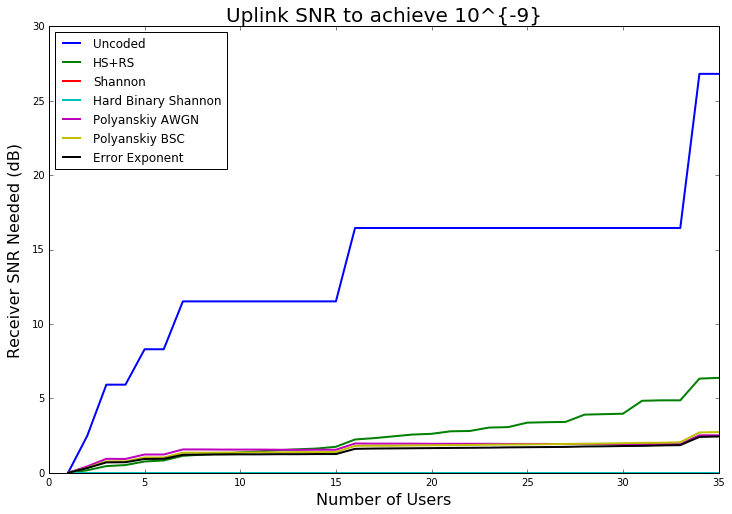

In [34]:
threshold = 10**(-9)

shannonthresh_n = zeros(35)
hardshannonthresh_n = zeros(35)
uppolythresh_n = zeros(35)
uphsrsthresh_n = zeros(35)
upbscthresh_n = zeros(35)
upexpthresh_n = zeros(35)
uncoded_n = 10*log10((Qinv(threshold)**2)/2) * ones(35)

for N in range(1,36):
#     rate = N*160/10000

    shannonfile = '../data_tables/shannon_tables/n' + str(N) + '.in'
    shannontable = load_table(shannonfile)
    shannonthresh_n[N-1] = shannontable[0][np.where(np.array(shannontable[1])<=threshold)[0][0]]
    
    hardshannonfile = '../data_tables/hard_shannon_tables/n' + str(N) + '.in'
    hardshannontable = load_table(hardshannonfile)
    hardshannonthresh_n[N-1] = hardshannontable[0][np.where(np.array(hardshannontable[1])<=threshold)[0][0]]
    
    filename = '../data_tables/hs_rs_uplink/n' + str(N) + '.in'
    hsrstable = load_table(filename)
    uphsrsthresh_n[N-1] = hsrstable[0][np.where(np.array(hsrstable[1])<=threshold)[0][0]]
    
    polyfile = '../data_tables/polyanskiy_up/n' + str(N) + '.in'
    polytable = load_table(polyfile)
    uppolythresh_n[N-1] = polytable[0][np.where(np.array(polytable[1])<=threshold)[0][0]]
    
    bscfile = '../data_tables/poly_bsc_converse/up/n' + str(N) + '.in'
    bsctable = load_table(bscfile)
    upbscthresh_n[N-1] = bsctable[0][np.where(np.array(bsctable[1])<=threshold)[0][0]]
    
    expfile = '../data_tables/error_exp/up/n' + str(N) + '.in'
    exptable = load_table(expfile)
    upexpthresh_n[N-1] = exptable[0][np.where(np.array(exptable[1])<=threshold)[0][0]]

figure(figsize=(12, 8))
plot(range(1,36), uncoded_n-uncoded, lw=2.0, label='Uncoded')
plot(range(1,36), uphsrsthresh_n-uphsrsthresh, lw=2.0, label='HS+RS')
plot(range(1,36), shannonthresh_n-shannonthresh, lw=2.0, label='Shannon')
plot(range(1,36), hardshannonthresh_n-hardshannonthresh, lw=2.0, label='Hard Binary Shannon')
plot(range(1,36), uppolythresh_n-uppolythresh, lw=2.0, label='Polyanskiy AWGN')
plot(range(1, 36), upbscthresh_n-upbscthresh, lw=2.0, label='Polyanskiy BSC')
plot(range(1, 36), upexpthresh_n-upexpthresh, lw=2.0, label='Error Exponent')
xlabel('Number of Users', fontsize=16)
ylabel('Receiver SNR Needed (dB)', fontsize=16, labelpad=10)
title('Uplink SNR to achieve 10^{-9}', fontsize=20)
legend(loc=0)
savefig('slice_waterfall_up_optimize_penalty.pdf', bbox='tight')

# Energy Combining Less Loudest Talker

In [44]:
ecc = {
    'hamming' : array([ 88.7,  46.,   31.5,  25.6,  20.3,  17.1,  14.9,  13.2,  11.9,  10.8,  10.,    9.3,
   8.7,   8.2,   7.7,   7.3,   7.,    6.7,   6.5,   6.3,   6.1,   5.9,   5.8,   5.7,
   5.6,   5.6,   5.5,   5.5,   5.5,   5.5,   5.6,   5.8,   5.9,   6.2]),
    'shannon' : array([ 7.05000000e+01,   3.09000000e+01,   1.84000000e+01,   1.36000000e+01,
   9.20000000e+00,   6.70000000e+00,   5.00000000e+00,   3.70000000e+00,
   2.90000000e+00,   2.20000000e+00,   1.70000000e+00,   1.30000000e+00,
   9.00000000e-01,   7.00000000e-01,   4.00000000e-01,   3.00000000e-01,
   1.00000000e-01,   6.38378239e-16,  -1.00000000e-01,  -2.00000000e-01,
  -3.00000000e-01,  -3.00000000e-01,  -3.00000000e-01,  -4.00000000e-01,
  -4.00000000e-01,  -4.00000000e-01,  -4.00000000e-01,  -4.00000000e-01,
  -4.00000000e-01,  -4.00000000e-01,  -4.00000000e-01,  -4.00000000e-01,
  -4.00000000e-01,  -4.00000000e-01]),
    'hardshannon' : array([ 72.5,  32.9,  20.4,  15.6,  11.2,   8.7,   7.,    5.8,   4.9,   4.3,   3.8,   3.4,
   3.1,   2.8,   2.6,   2.5,   2.3,   2.2,   2.1,   2.1,   2.,    2.,    2.,    2.,
   2.,    2.,    2.,    2.1,   2.1,   2.1,   2.2,   2.2,   2.3,   2.3]),
    'polyanskiy' : array([  7.08000000e+01,   3.10000000e+01,   1.82000000e+01,   1.34000000e+01,
   9.00000000e+00,   6.60000000e+00,   4.90000000e+00,   3.80000000e+00,
   2.90000000e+00,   2.20000000e+00,   1.70000000e+00,   1.30000000e+00,
   9.00000000e-01,   7.00000000e-01,   4.00000000e-01,   3.00000000e-01,
   1.00000000e-01,   6.38378239e-16,  -1.00000000e-01,  -2.00000000e-01,
  -2.00000000e-01,  -3.00000000e-01,  -3.00000000e-01,  -4.00000000e-01,
  -4.00000000e-01,  -4.00000000e-01,  -4.00000000e-01,  -4.00000000e-01,
  -4.00000000e-01,  -4.00000000e-01,  -4.00000000e-01,  -4.00000000e-01,
  -4.00000000e-01,  -4.00000000e-01]),
    'polyanskiy_bsc' : array([ 72.6,  32.9,  20.1,  15.4,  11.,    8.6,   7.,    5.8,   4.9,   4.3,   3.8,   3.4,
   3.1,   2.8,   2.6,   2.4,   2.3,   2.2,   2.1,   2.1,   2.,    2.,    2.,    2.,
   2.,    2.,    2.,    2.,    2.1,   2.1,   2.2,   2.2,   2.3,   2.3]),
    'polyanskiy_bsc_converse' : array([ 72.6,  32.9,  30.3,  15.4,  11.,    8.6,   7.,    5.8,   4.9,   4.3,   3.8,   3.4,
   3.1,   2.8,   2.6,   2.4,   2.3,   2.2,   2.1,   2.1,   2.,    2.,    2.,    2.,
   2.,    2.,    2.,    2.,    2.1,   2.1,   2.2,   2.2,   2.3,   2.3]),
    'error_exp' : array([ 73.4,  33.4,  20.6,  15.8,  11.4,   8.9,   7.3,   6.1,   5.2,   4.5,   4.,    3.6,
   3.3,   3.,    2.8,   2.6,   2.5,   2.4,   2.3,   2.3,   2.2,   2.2,   2.2,   2.2,
   2.2,   2.2,   2.2,   2.2,   2.2,   2.3,   2.3,   2.4,   2.4,   2.5])
}

CPU times: user 8.88 s, sys: 143 ms, total: 9.02 s
Wall time: 9.23 s


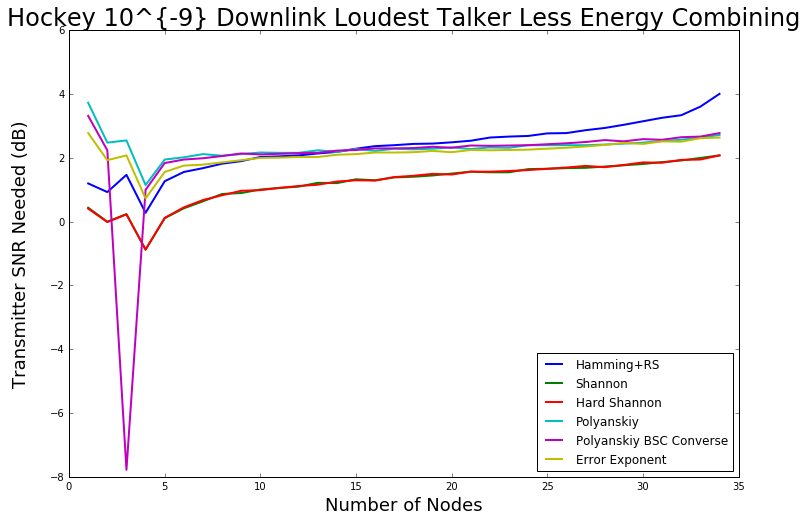

In [45]:
%%time
dSNR = 0.01
target = 10**(-9)
paddratio = 0.1 # padd = 10**(-10)
start_SNR = 0
start_nodes, end_nodes = 1, 35

shannonscheme = '../data_tables/shannon_tables'
hardshannonscheme = '../data_tables/hard_shannon_tables'
hsrsscheme = '../data_tables/hs_rs_downlink'
polyscheme = '../data_tables/polyanskiy_down'
bscscheme = '../data_tables/poly_bsc_converse/down'
expscheme = '../data_tables/error_exp/down'

shannon_down = loudest_talker(shannonscheme, dSNR, target, paddratio, start_SNR, start_nodes, end_nodes)
hardshannon_down = loudest_talker(hardshannonscheme, dSNR, target, paddratio, start_SNR, start_nodes, end_nodes)
hsrs_down = loudest_talker(hsrsscheme, dSNR, target, paddratio, start_SNR, start_nodes, end_nodes)
polyanskiy_down = loudest_talker(polyscheme, dSNR, target, paddratio, start_SNR, start_nodes, end_nodes)
bsc_down = loudest_talker(bscscheme, dSNR, target, paddratio, start_SNR, start_nodes, end_nodes)
exp_down = loudest_talker(expscheme, dSNR, target, paddratio, start_SNR, start_nodes, end_nodes)

user_range = range(start_nodes, end_nodes)

figure(figsize=(12, 8))
plot(user_range, hsrs_down-ecc['hamming'], lw=2.0, label='Hamming+RS')
plot(user_range, shannon_down-ecc['shannon'], lw=2.0, label='Shannon')
plot(user_range, hardshannon_down-ecc['hardshannon'], lw=2.0, label='Hard Shannon')
plot(user_range, polyanskiy_down-ecc['polyanskiy'], lw=2.0, label='Polyanskiy')
plot(user_range, bsc_down-ecc['polyanskiy_bsc_converse'], lw=2.0, label='Polyanskiy BSC Converse')
plot(user_range, exp_down-ecc['error_exp'], lw=2.0, label='Error Exponent')
legend(loc=0)
xlabel('Number of Nodes', fontsize=18)
ylabel('Transmitter SNR Needed (dB)', fontsize=18, labelpad=20)
title('Hockey 10^{-9} Downlink Loudest Talker Less Energy Combining', fontsize=24)
savefig('hockey_loudest_ecc_penalty.pdf', bbox='tight')

# Energy Combining Uplink

In [35]:
%%time

threshold = 10**(-9)
endpoint = 2
dfade = [10**(-3), 10**(-10), 10**(-3)]
dSNR = 0.1
start_nodes, end_nodes = 1, 35

print "Hamming RS"
hsrs_codingscheme = '../data_tables/hs_rs_uplink'
hsrs_start_SNR = 0
hsrs_ecc_up = energy_combining(hsrs_codingscheme, dSNR, dfade, endpoint, threshold, hsrs_start_SNR, start_nodes, end_nodes)
print hsrs_ecc_up
print ""

Hamming RS


/Users/leah.dickstein/Desktop/Leah/research-sahai/cow.py:118: RuntimeWarning: divide by zero encountered in log10
  optimize = codetable(op_SNR+10*np.log10(fade)) * fadexp.pdf(fade)
/Users/leah.dickstein/Desktop/Leah/research-sahai/cow.py:122: RuntimeWarning: divide by zero encountered in log10
  snrlookup = codetable(op_SNR+10*np.log10(fade))
/Users/leah.dickstein/Desktop/Leah/research-sahai/cow.py:126: RuntimeWarning: divide by zero encountered in log10
  snrlookup = codetable(op_SNR+10*np.log10(fade))


('P(protocol)', 1, 88.69999999999924, 9.899003667855336e-10)


/Users/leah.dickstein/Desktop/Leah/research-sahai/cow.py:137: RuntimeWarning: divide by zero encountered in log10
  snrlookup = codetable(op_SNR+10*np.log10(fade))
/Users/leah.dickstein/Desktop/Leah/research-sahai/cow.py:142: RuntimeWarning: divide by zero encountered in log10
  snrlookup = codetable(op_SNR+10*np.log10(fade))
/Users/leah.dickstein/Desktop/Leah/research-sahai/cow.py:147: RuntimeWarning: divide by zero encountered in log10
  snrlookup = codetable(op_SNR+10*np.log10(fade))


('P(protocol)', 2, 46.000000000000384, 9.5839493866802779e-10)
('P(protocol)', 3, 31.500000000000178, 9.5834054574229582e-10)
('P(protocol)', 4, 25.500000000000092, 9.9684958335739595e-10)
('P(protocol)', 5, 20.30000000000002, 9.5802018459225152e-10)
('P(protocol)', 6, 17.199999999999974, 9.0211715085926447e-10)
('P(protocol)', 7, 14.899999999999963, 9.0989824776209831e-10)
('P(protocol)', 8, 13.299999999999969, 8.769295672715876e-10)
('P(protocol)', 9, 11.899999999999974, 9.2763816209035912e-10)
('P(protocol)', 10, 10.899999999999977, 9.6667135725238682e-10)
('P(protocol)', 11, 10.09999999999998, 8.391655401522399e-10)
('P(protocol)', 12, 9.399999999999983, 8.4460690139644568e-10)
('P(protocol)', 13, 8.699999999999985, 8.4581757494508124e-10)
('P(protocol)', 14, 8.199999999999987, 7.5445452269945687e-10)
('P(protocol)', 15, 7.899999999999988, 7.9356328655545715e-10)
('P(protocol)', 16, 7.19999999999999, 9.8743602346190028e-10)
('P(protocol)', 17, 6.999999999999991, 8.5910019544129155e

In [36]:
shannon_ecc_up = array([ 7.05000000e+01,   3.09000000e+01,   1.84000000e+01,   1.36000000e+01,
   9.20000000e+00,   6.70000000e+00,   5.00000000e+00,   3.70000000e+00,
   2.90000000e+00,   2.20000000e+00,   1.70000000e+00,   1.30000000e+00,
   9.00000000e-01,   7.00000000e-01,   4.00000000e-01,   3.00000000e-01,
   1.00000000e-01,   6.38378239e-16,  -1.00000000e-01,  -2.00000000e-01,
  -3.00000000e-01,  -3.00000000e-01,  -3.00000000e-01,  -4.00000000e-01,
  -4.00000000e-01,  -4.00000000e-01,  -4.00000000e-01,  -4.00000000e-01,
  -4.00000000e-01,  -4.00000000e-01,  -4.00000000e-01,  -4.00000000e-01,
  -4.00000000e-01,  -4.00000000e-01])

hardshannon_ecc_up = array([ 72.5,  32.9,  20.4,  15.6,  11.2,   8.7,   7.,    5.8,   4.9,   4.3,   3.8,   3.4,
   3.1,   2.8,   2.6,   2.5,   2.3,   2.2,   2.1,   2.1,   2.,    2.,    2.,    2.,
   2.,    2.,    2.,    2.1,   2.1,   2.1,   2.2,   2.2,   2.3,   2.3])

In [38]:
print "Polyanskiy"
poly_codingscheme = '../data_tables/polyanskiy_up'
poly_start_SNR = -2
poly_ecc_up = energy_combining(poly_codingscheme, dSNR, dfade, endpoint, threshold, poly_start_SNR, start_nodes, end_nodes)
print poly_ecc_up
print ""

print "Polyanskiy BSC"
bsc_codingscheme = '../data_tables/poly_bsc_converse/up'
bsc_start_SNR = -2
bsc_ecc_up = energy_combining(bsc_codingscheme, dSNR, dfade, endpoint, threshold, bsc_start_SNR, start_nodes, end_nodes)
print bsc_ecc_up
print ""

Polyanskiy
('P(protocol)', 1, 70.80000000000025, 9.8590589235008118e-10)
('P(protocol)', 2, 31.000000000000174, 9.6921747550709368e-10)
('P(protocol)', 3, 18.199999999999992, 9.636123254773997e-10)
('P(protocol)', 4, 13.19999999999997, 9.6676993868882268e-10)
('P(protocol)', 5, 9.099999999999985, 9.0207949877339217e-10)
('P(protocol)', 6, 6.599999999999993, 9.6750753185809277e-10)
('P(protocol)', 7, 4.999999999999999, 9.0248299634728001e-10)
('P(protocol)', 8, 3.800000000000003, 9.2764488823674611e-10)
('P(protocol)', 9, 2.900000000000002, 9.6392813787439438e-10)
('P(protocol)', 10, 2.3000000000000016, 8.2450171728161154e-10)
('P(protocol)', 11, 1.7000000000000013, 9.7076231655077313e-10)
('P(protocol)', 12, 1.300000000000001, 9.3167806623390945e-10)
('P(protocol)', 13, 1.0000000000000007, 8.4654624660092439e-10)
('P(protocol)', 14, 0.7000000000000006, 9.1323924741015128e-10)
('P(protocol)', 15, 0.5000000000000007, 8.5337931261595613e-10)
('P(protocol)', 16, 0.30000000000000066, 9.0060

In [39]:
print "Error Exponent"
exp_codingscheme = '../data_tables/error_exp/up'
exp_start_SNR = -2
exp_ecc = energy_combining(exp_codingscheme, dSNR, dfade, endpoint, threshold, exp_start_SNR, start_nodes, end_nodes)
print exp_ecc
print ""

Error Exponent
('P(protocol)', 1, 74.50000000000004, 9.011587755228515e-10)
('P(protocol)', 2, 33.60000000000021, 9.949163646799342e-10)
('P(protocol)', 3, 20.90000000000003, 9.4411399027314698e-10)
('P(protocol)', 4, 15.999999999999961, 9.7682110695688992e-10)
('P(protocol)', 5, 11.699999999999976, 9.9073912108331424e-10)
('P(protocol)', 6, 9.299999999999985, 9.7719746279513402e-10)
('P(protocol)', 7, 7.6999999999999895, 9.3388210673370734e-10)
('P(protocol)', 8, 6.499999999999994, 9.9142080140574415e-10)
('P(protocol)', 9, 5.699999999999997, 8.8077664133694375e-10)
('P(protocol)', 10, 4.999999999999999, 9.6266055944967247e-10)
('P(protocol)', 11, 4.500000000000001, 9.4714430235184615e-10)
('P(protocol)', 12, 4.100000000000002, 9.5173566538481899e-10)
('P(protocol)', 13, 3.800000000000003, 9.1361305799545341e-10)
('P(protocol)', 14, 3.6000000000000028, 7.8651732451872467e-10)
('P(protocol)', 15, 3.4000000000000026, 7.776153381048595e-10)
('P(protocol)', 16, 3.2000000000000024, 8.77098

CPU times: user 8.15 s, sys: 46.5 ms, total: 8.2 s
Wall time: 8.18 s


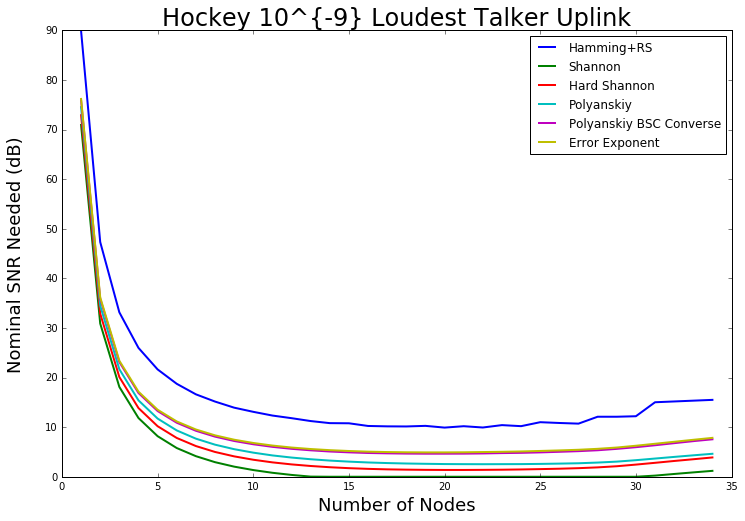

In [42]:
%%time
dSNR = 0.01
target = 10**(-9)
paddratio = 0.1 # padd = 10**(-10)
start_SNR = 0
start_nodes, end_nodes = 1, 35

shannonscheme = '../data_tables/shannon_tables'
hardshannonscheme = '../data_tables/hard_shannon_tables'
hsrsscheme = '../data_tables/hs_rs_uplink'
polyscheme = '../data_tables/polyanskiy_up'
bscscheme = '../data_tables/poly_bsc_converse/up'
expscheme = '../data_tables/error_exp/up'

shannon_up = uplink(shannonscheme, dSNR, target, paddratio, start_SNR, start_nodes, end_nodes)
hardshannon_up = uplink(hardshannonscheme, dSNR, target, paddratio, start_SNR, start_nodes, end_nodes)
hsrs_up = uplink(hsrsscheme, dSNR, target, paddratio, start_SNR, start_nodes, end_nodes)
polyanskiy_up = uplink(polyscheme, dSNR, target, paddratio, start_SNR, start_nodes, end_nodes)
bsc_up = uplink(bscscheme, dSNR, target, paddratio, start_SNR, start_nodes, end_nodes)
exp_up = uplink(expscheme, dSNR, target, paddratio, start_SNR, start_nodes, end_nodes)

user_range = range(start_nodes, end_nodes)

figure(figsize=(12, 8))
plot(user_range, hsrs_up, lw=2.0, label='Hamming+RS')
plot(user_range, shannon_up, lw=2.0, label='Shannon')
plot(user_range, hardshannon_up, lw=2.0, label='Hard Shannon')
plot(user_range, polyanskiy_up, lw=2.0, label='Polyanskiy')
plot(user_range, bsc_up, lw=2.0, label='Polyanskiy BSC Converse')
plot(user_range, exp_up, lw=2.0, label='Error Exponent')
legend(loc=0)
xlabel('Number of Nodes', fontsize=18)
ylabel('Nominal SNR Needed (dB)', fontsize=18, labelpad=20)
title('Hockey 10^{-9} Loudest Talker Uplink', fontsize=24)
# savefig('hockey_uplink_loudest.pdf', bbox='tight')

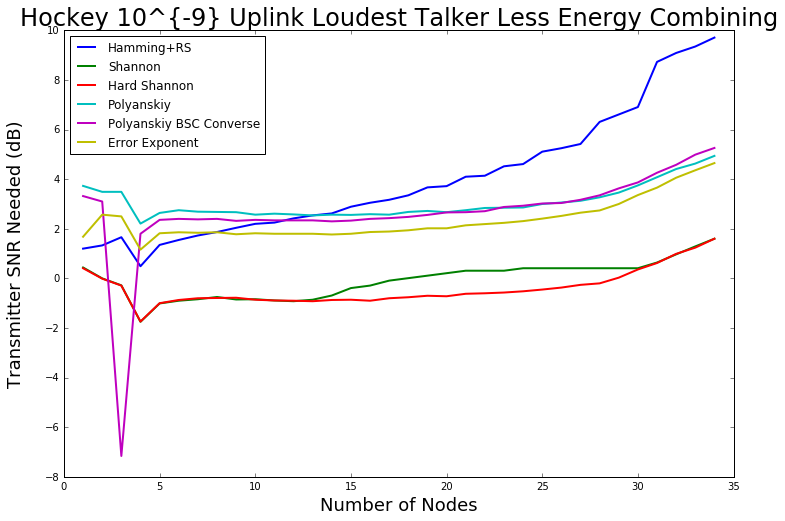

In [43]:
figure(figsize=(12, 8))
plot(user_range, hsrs_up-hsrs_ecc_up, lw=2.0, label='Hamming+RS')
plot(user_range, shannon_up-shannon_ecc_up, lw=2.0, label='Shannon')
plot(user_range, hardshannon_up-hardshannon_ecc_up, lw=2.0, label='Hard Shannon')
plot(user_range, polyanskiy_up-poly_ecc_up, lw=2.0, label='Polyanskiy')
plot(user_range, bsc_up-bsc_ecc_up, lw=2.0, label='Polyanskiy BSC Converse')
plot(user_range, exp_up-exp_ecc, lw=2.0, label='Error Exponent')
legend(loc=0)
xlabel('Number of Nodes', fontsize=18)
ylabel('Transmitter SNR Needed (dB)', fontsize=18, labelpad=20)
title('Hockey 10^{-9} Uplink Loudest Talker Less Energy Combining', fontsize=24)
savefig('hockey_up_loudest_ecc_penalty.pdf', bbox='tight')

# Energy Combining Less Optimize 3

In [47]:
optimize_3_codes = {'hardshannon': array([ 32.89,  20.64,  14.75,  11.34,   9.23,   7.75,   6.68,   5.86,
         5.28,   4.88,   4.52,   4.27,   4.09,   3.89,   3.74,   3.64,
         3.57,   3.54,   3.54,   3.46,   3.5 ,   3.47,   3.54,   3.54,
         3.54,   3.56,   3.69,   3.73,   3.77,   3.83,   3.89,   3.96,
         4.03,   4.11]), 'polyanskiy': array([ 33.77,  21.07,  14.91,  11.33,   9.03,   7.45,   6.32,   5.47,
         4.83,   4.34,   3.94,   3.63,   3.37,   3.17,   3.  ,   2.87,
         2.76,   2.67,   2.6 ,   2.54,   2.5 ,   2.46,   2.44,   2.43,
         2.42,   2.41,   2.41,   2.42,   2.43,   2.45,   2.46,   2.48,
         2.51,   2.53]), 'hamming': array([ 47.1 ,  33.17,  26.14,  21.88,  19.01,  16.91,  15.43,  14.19,
        13.31,  12.53,  11.92,  11.3 ,  10.82,  10.62,  10.04,   9.84,
         9.65,   9.59,   9.14,   9.19,   8.86,   9.02,   8.72,   9.09,
         8.82,   8.58,   9.2 ,   8.96,   8.79,  10.  ,   9.79,   9.71,
        10.06,  11.58]), 'bsc': array([   inf,  22.75,  16.65,  13.12,  10.85,   9.3 ,   8.2 ,   7.39,
         6.77,   6.3 ,   5.93,   5.64,   5.41,   5.24,   5.1 ,   4.99,
         4.9 ,   4.85,   4.8 ,   4.77,   4.75,   4.77,   4.76,   4.78,
         4.81,   4.84,   4.88,   4.94,   4.98,   5.03,   5.11,   5.19,
         5.25,   5.3 ]), 'shannon': array([ 30.99,  18.64,  12.75,   9.34,   7.13,   5.65,   4.58,   3.86,
         3.27,   2.78,   2.42,   2.17,   1.89,   1.69,   1.54,   1.44,
         1.37,   1.34,   1.24,   1.16,   1.2 ,   1.17,   1.14,   1.14,
         1.14,   1.16,   1.19,   1.23,   1.17,   1.23,   1.29,   1.26,
         1.33,   1.31]), 'error_exp': array([   inf,  23.1 ,  17.03,  13.51,  11.25,   9.72,   8.62,   7.81,
         7.21,   6.74,   6.38,   6.1 ,   5.87,   5.7 ,   5.57,   5.47,
         5.39,   5.33,   5.29,   5.27,   5.26,   5.26,   5.28,   5.3 ,
         5.33,   5.36,   5.41,   5.46,   5.52,   5.58,   5.65,   5.72,
         5.8 ,   5.88])}

In [54]:
print ecc.keys()

['hardshannon', 'polyanskiy_bsc', 'polyanskiy', 'hamming', 'polyanskiy_bsc_converse', 'shannon', 'error_exp']


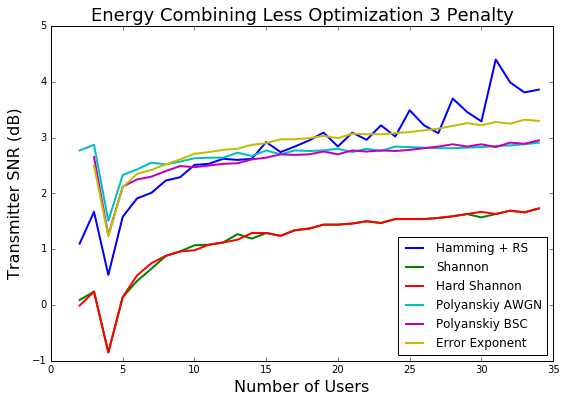

In [63]:
user_range=arange(2, 35, 1)
figure(figsize=(9, 6))
plot(user_range, optimize_3_codes['hamming'][:-1]-ecc['hamming'][1:], lw=2.0, label='Hamming + RS')
plot(user_range, optimize_3_codes['shannon'][:-1]-ecc['shannon'][1:], lw=2.0, label='Shannon')
plot(user_range, optimize_3_codes['hardshannon'][:-1]-ecc['hardshannon'][1:], lw=2.0, label='Hard Shannon')
plot(user_range, optimize_3_codes['polyanskiy'][:-1]-ecc['polyanskiy'][1:], lw=2.0, label='Polyanskiy AWGN')
plot(user_range, optimize_3_codes['bsc'][:-1]-ecc['polyanskiy_bsc'][1:], lw=2.0, label='Polyanskiy BSC')
plot(user_range, optimize_3_codes['error_exp'][:-1]-ecc['error_exp'][1:], lw=2.0, label='Error Exponent')
legend(loc=0)
xlabel('Number of Users', fontsize=16)
ylabel('Transmitter SNR (dB)', fontsize=16, labelpad=10)
title('Energy Combining Less Optimization 3 Penalty', fontsize=18)
savefig('ecc_optimize3_penalty_2.pdf', bbox='tight')

In [62]:
print optimize_3_codes['bsc'][:-1]-ecc['polyanskiy_bsc_converse'][1:]
print optimize_3_codes['bsc'][:-1]-ecc['polyanskiy_bsc'][1:]
print optimize_3_codes['error_exp'][:-1]-ecc['error_exp'][1:]

[  inf -7.55  1.25  2.12  2.25  2.3   2.4   2.49  2.47  2.5   2.53  2.54
  2.61  2.64  2.7   2.69  2.7   2.75  2.7   2.77  2.75  2.77  2.76  2.78
  2.81  2.84  2.88  2.84  2.88  2.83  2.91  2.89  2.95]
[  inf  2.65  1.25  2.12  2.25  2.3   2.4   2.49  2.47  2.5   2.53  2.54
  2.61  2.64  2.7   2.69  2.7   2.75  2.7   2.77  2.75  2.77  2.76  2.78
  2.81  2.84  2.88  2.84  2.88  2.83  2.91  2.89  2.95]
[  inf  2.5   1.23  2.11  2.35  2.42  2.52  2.61  2.71  2.74  2.78  2.8
  2.87  2.9   2.97  2.97  2.99  3.03  2.99  3.07  3.06  3.06  3.08  3.1
  3.13  3.16  3.21  3.26  3.22  3.28  3.25  3.32  3.3 ]
